In [1]:
from pathlib import Path
import pandas as pd
import plotnine as p9
import datetime as dt
import numpy as np
import statsmodels.api as sm
import re
import seaborn as sns
import patsy
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read GeoIDs - County.csv and COVID - County - Daily.csv
GeoIDs_County = pd.read_csv("GeoIDs - County.csv")
COVID_County_Daily = pd.read_csv("COVID - County - Daily.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
# combine two datasets
countys = pd.merge(GeoIDs_County,COVID_County_Daily,on="countyfips")
countys

,countyfips,countyname,cityid,cityname,cz,czname,statename,statefips,stateabbrev,county_pop2019,...,new_death_rate,death_rate,fullvaccine_count,vaccine_count,new_vaccine_count,new_fullvaccine_count,new_vaccine_rate,vaccine_rate,new_fullvaccine_rate,fullvaccine_rate
0,1001,Autauga,NaN,NaN,11101.0,Montgomery,Alabama,1,AL,55869,...,.,.,.,.,.,.,.,.,.,.
1,1001,Autauga,NaN,NaN,11101.0,Montgomery,Alabama,1,AL,55869,...,.,.,.,.,.,.,.,.,.,.
2,1001,Autauga,NaN,NaN,11101.0,Montgomery,Alabama,1,AL,55869,...,.,.,.,.,.,.,.,.,.,.
3,1001,Autauga,NaN,NaN,11101.0,Montgomery,Alabama,1,AL,55869,...,.,.,.,.,.,.,.,.,.,.
4,1001,Autauga,NaN,NaN,11101.0,Montgomery,Alabama,1,AL,55869,...,.,.,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091064,56045,Weston,NaN,NaN,34601.0,Gillette,Wyoming,56,WY,6927,...,2.06,138,2264,2512,4,3,.0577,36.3,.0454,32.7
2091065,56045,Weston,NaN,NaN,34601.0,Gillette,Wyoming,56,WY,6927,...,2.06,140,2273,2526,4,3,.0577,36.5,.0495,32.8
2091066,56045,Weston,NaN,NaN,34601.0,Gillette,Wyoming,56,WY,6927,...,2.06,142,2273,2526,4,3,.0577,36.5,.0495,32.8
2091067,56045,Weston,NaN,NaN,34601.0,Gillette,Wyoming,56,WY,6927,...,2.06,144,2273,2526,4,3,.0577,36.5,.0495,32.8


In [4]:
# index of rows with data
index1 = countys.vaccine_rate[countys.vaccine_rate!= '.'].index
index2 = countys.new_case_count[countys.new_case_count!= '.'].index
index = sorted(list(set(index1).intersection(set(index2))))

In [5]:
# select nonempty part of dataset
subset = countys.iloc[index]
subset["vaccine_rate"] = subset["vaccine_rate"].astype(float)
subset["new_case_count"] =subset["new_case_count"].astype(int)

<ipython-input-5-10ef4fe79c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-5-10ef4fe79c80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# def a function to plot all county regression plot for specific state
def county_in_state(stateabbrev):
    data = subset[subset["stateabbrev"]==stateabbrev]
    sns.lmplot(x="vaccine_rate", y="new_case_count", col="countyname", hue="countyname", data=data,
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 1, "alpha": 1})
    plt.savefig(stateabbrev +'.pdf')
    print(stateabbrev+"plot saved")

CTplot saved
MDplot saved
MAplot saved
NJplot saved
NYplot saved


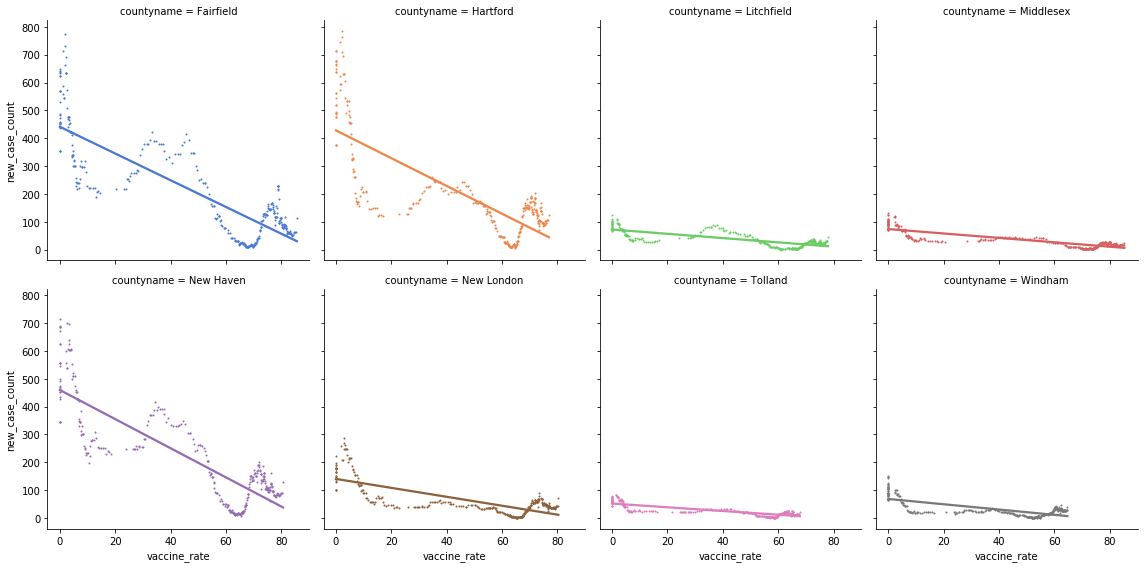

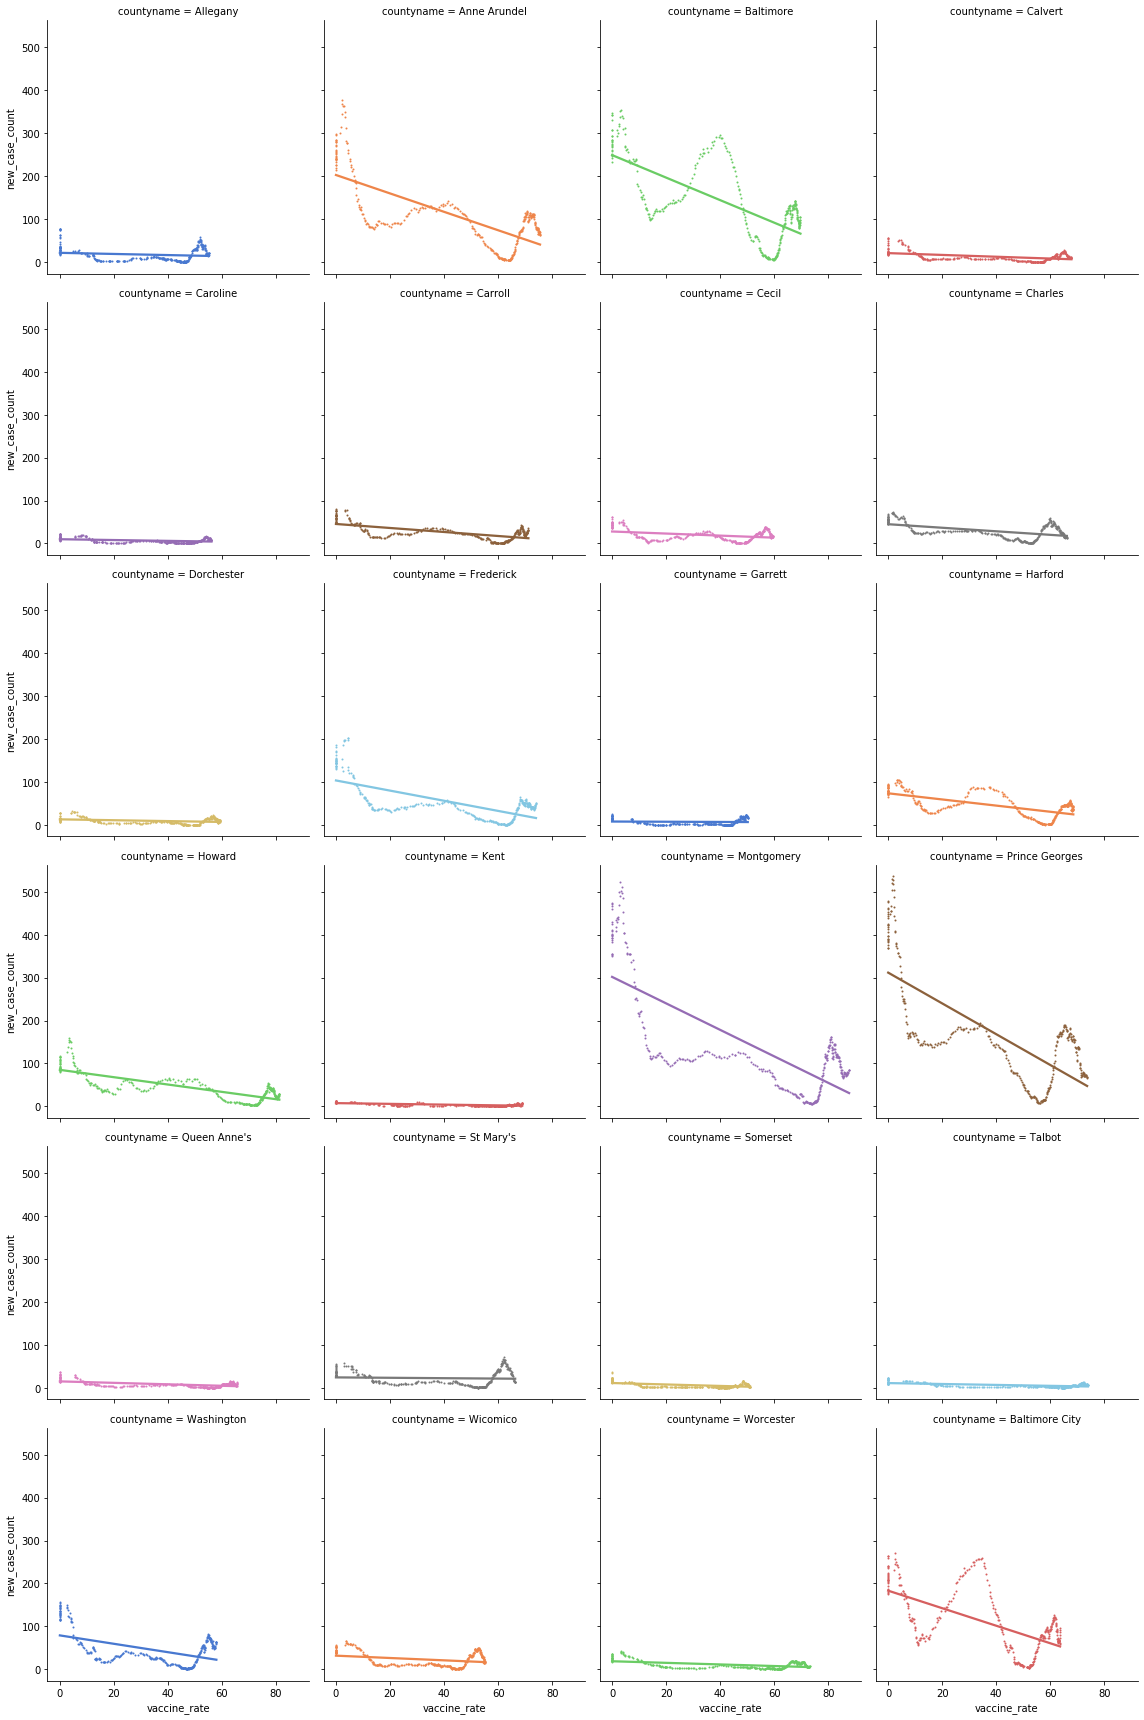

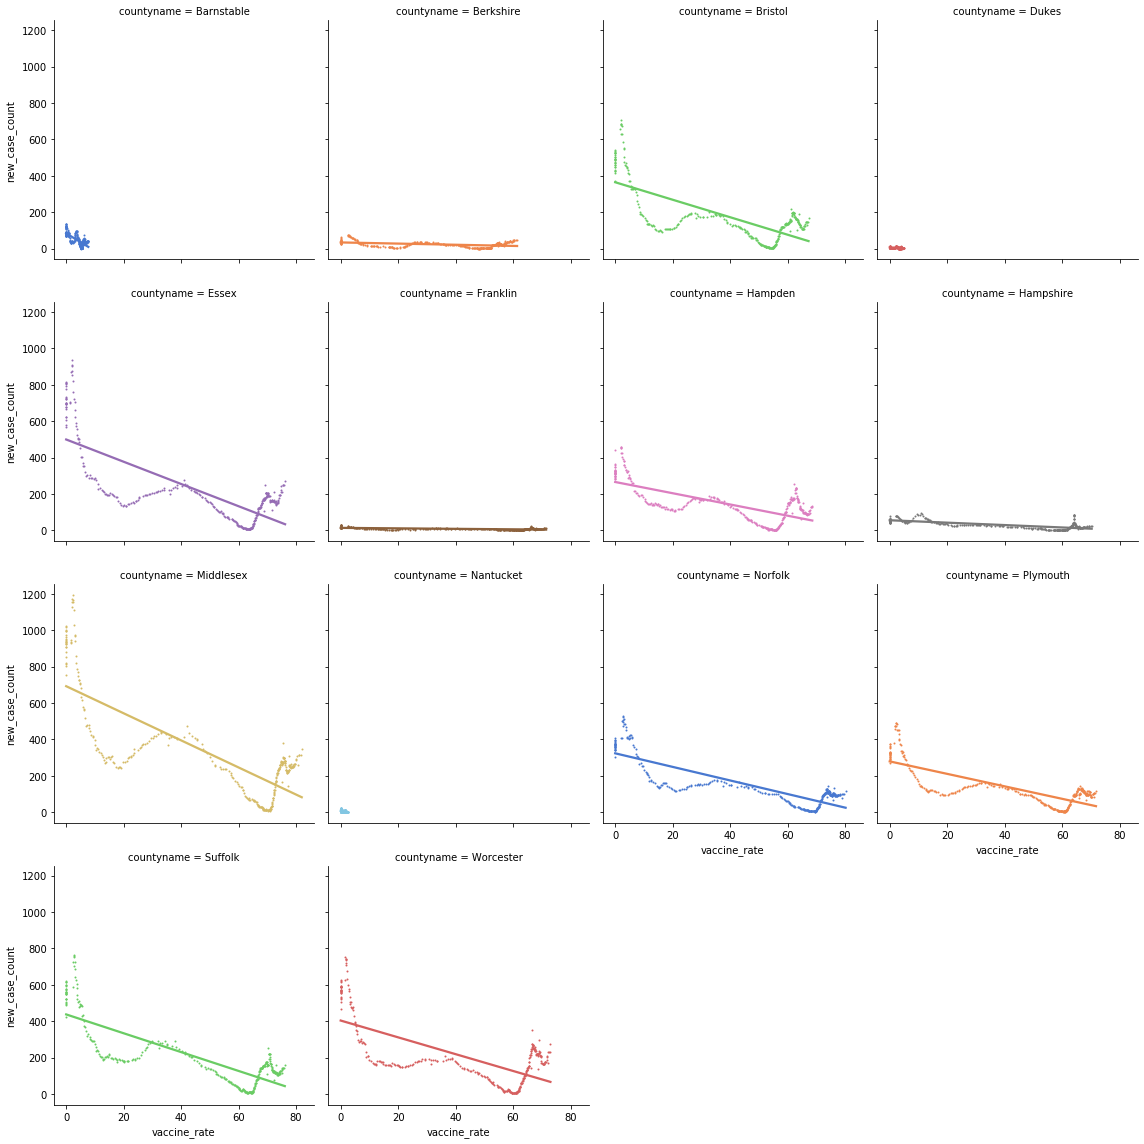

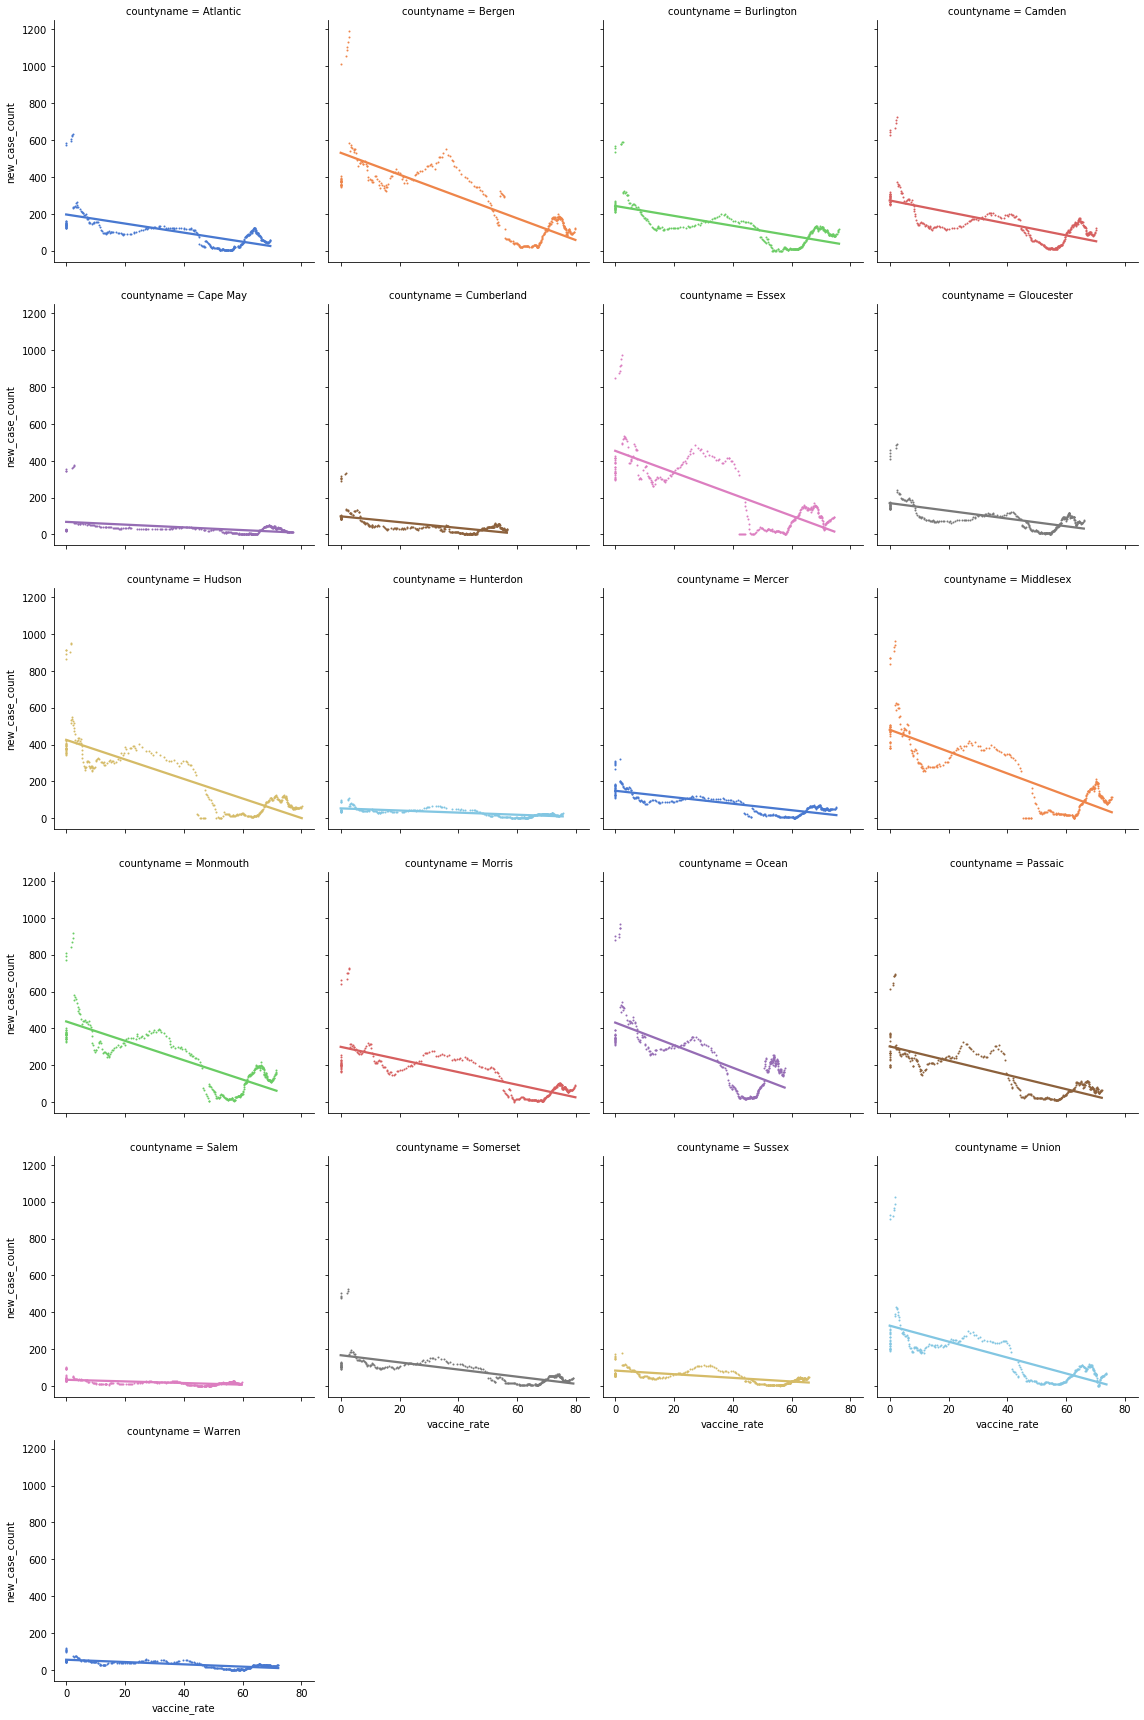

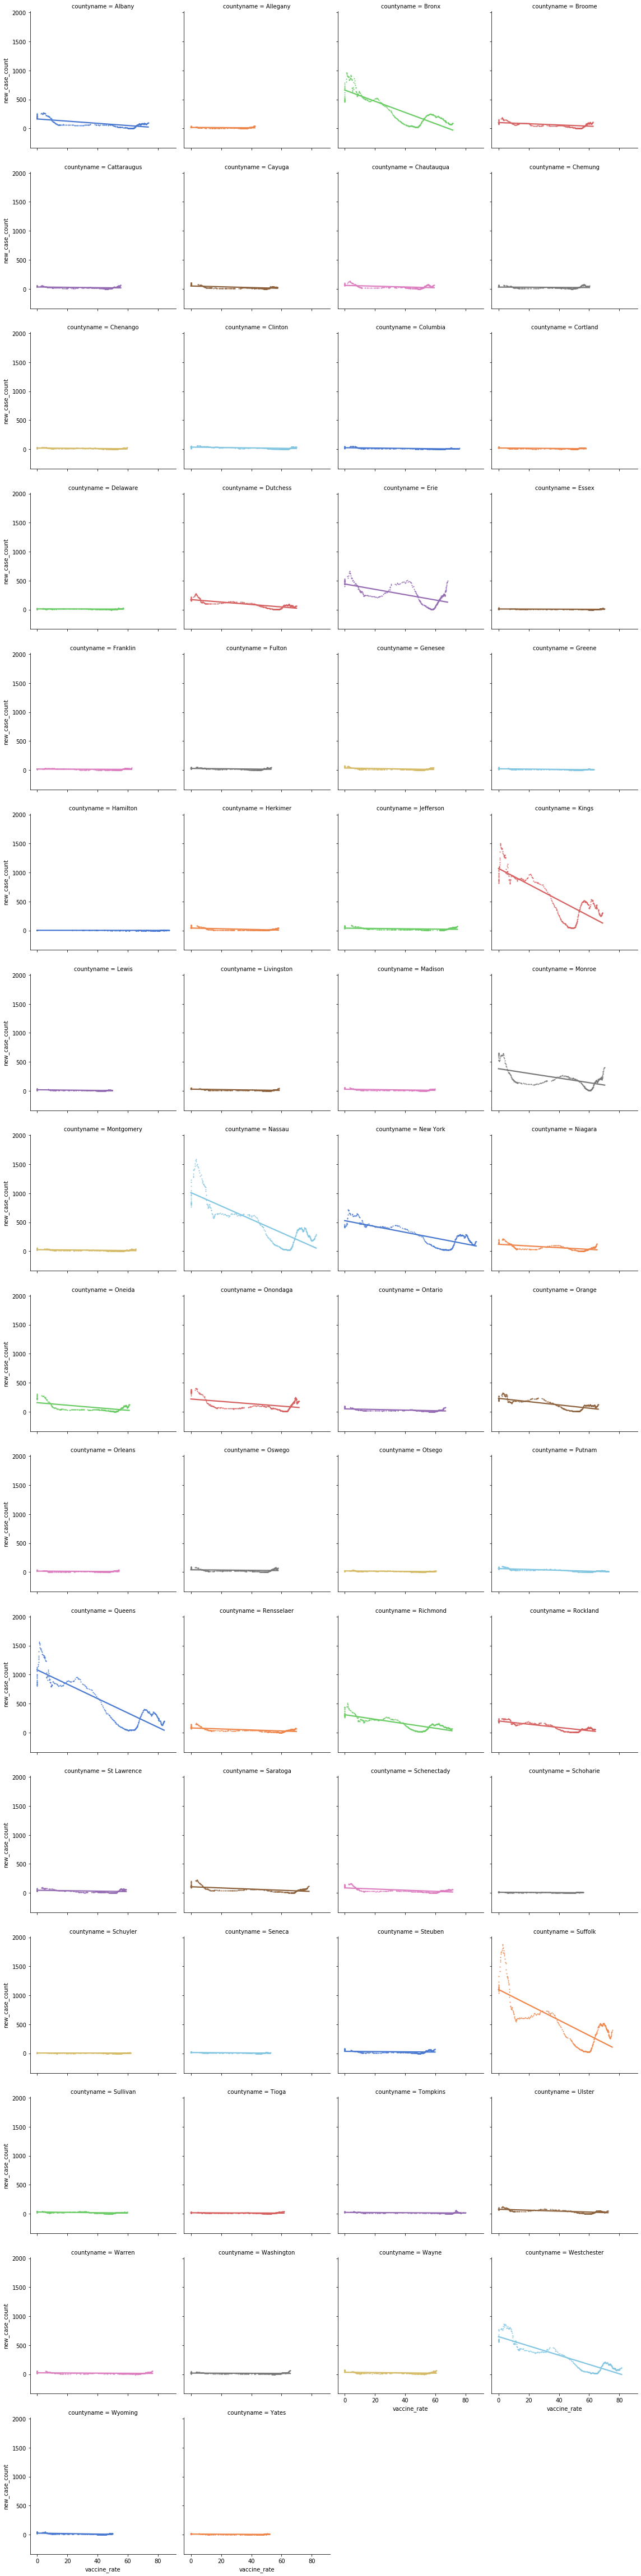

In [7]:
# find county level regression on state CT MD MA NJ NY, where vaccination rate increases, new cases decreases
county_in_state("CT") 
county_in_state("MD")
county_in_state("MA")
county_in_state("NJ")
county_in_state("NY")

<ipython-input-8-73ddd47475ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib

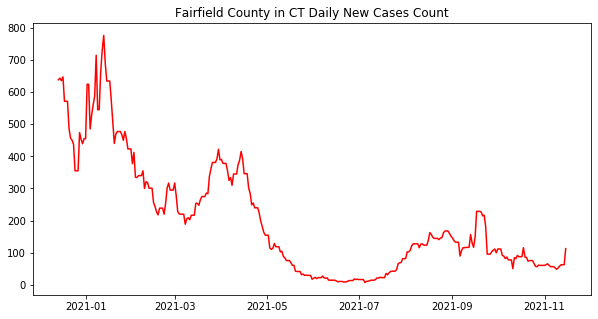

In [8]:
# found timeseries of most populated county in CT MD MA NJ NY
# Fairfield (most populated county in CT) Timeseries Plot New cases
data = subset[(subset["stateabbrev"]=="CT")&(subset["countyname"]=="Fairfield")]
data["date"] = pd.to_datetime(data[["year", "month", "day"]])
newcases= data[data["new_case_count"]!="."].new_case_count.astype(int)
date= data[data["new_case_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, newcases, color = 'red')
ax.set_title('Fairfield County in CT Daily New Cases Count')
plt.savefig('Fairfield_Timeseries.pdf')

<ipython-input-9-863c248ec020>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib

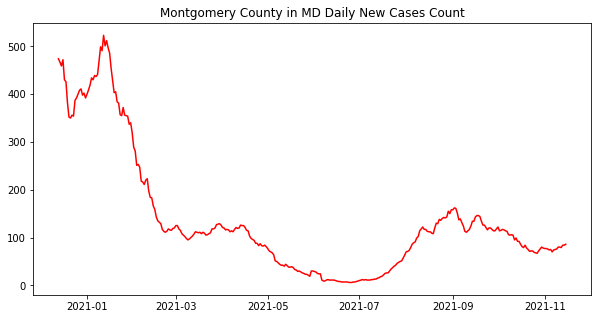

In [9]:
# Montgomery (most populated county in MD) Timeseries Plot New cases
data = subset[(subset["stateabbrev"]=="MD")&(subset["countyname"]=="Montgomery")]
data["date"] = pd.to_datetime(data[["year", "month", "day"]])
newcases= data[data["new_case_count"]!="."].new_case_count.astype(int)
date= data[data["new_case_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, newcases, color = 'red')
ax.set_title('Montgomery County in MD Daily New Cases Count')
plt.savefig('Montgomery_Timeseries.pdf')

<ipython-input-10-b78aed061c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotli

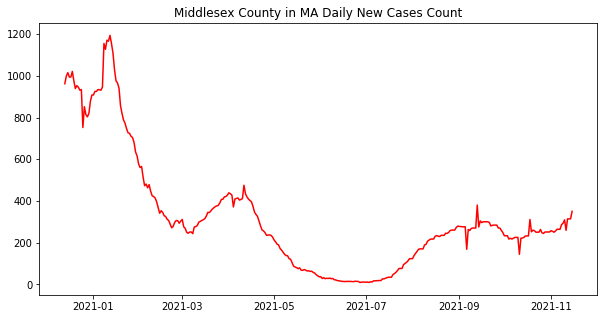

In [10]:
# Middlesex (most populated county in MA) Timeseries Plot New cases
data = subset[(subset["stateabbrev"]=="MA")&(subset["countyname"]=="Middlesex")]
data["date"] = pd.to_datetime(data[["year", "month", "day"]])
newcases= data[data["new_case_count"]!="."].new_case_count.astype(int)
date= data[data["new_case_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, newcases, color = 'red')
ax.set_title('Middlesex County in MA Daily New Cases Count')
plt.savefig('Middlesex_Timeseries.pdf')

<ipython-input-11-52de3b89e7f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotli

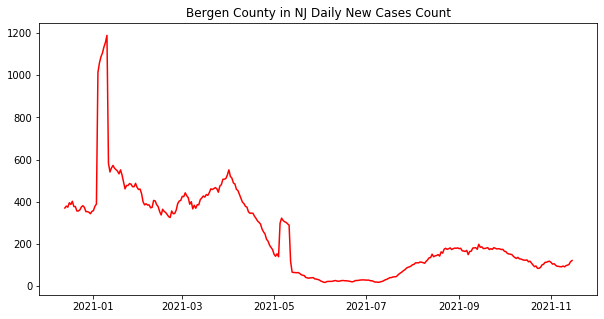

In [11]:
# Bergen (most populated county in NJ) Timeseries Plot New cases
data = subset[(subset["stateabbrev"]=="NJ")&(subset["countyname"]=="Bergen")]
data["date"] = pd.to_datetime(data[["year", "month", "day"]])
newcases= data[data["new_case_count"]!="."].new_case_count.astype(int)
date= data[data["new_case_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, newcases, color = 'red')
ax.set_title('Bergen County in NJ Daily New Cases Count')
plt.savefig('Bergen_Timeseries.pdf')

<ipython-input-6-17cb13c5efde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib

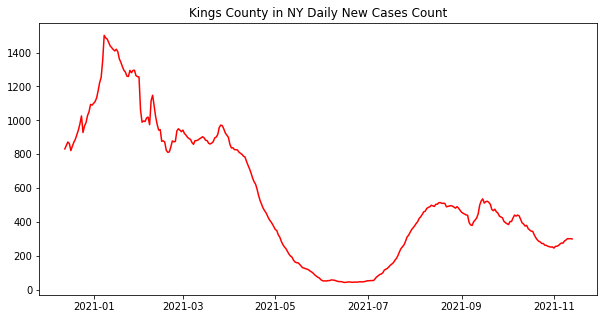

In [6]:
# Bergen (most populated county in NY) Timeseries Plot New cases
data = subset[(subset["stateabbrev"]=="NY")&(subset["countyname"]=="Kings")]
data["date"] = pd.to_datetime(data[["year", "month", "day"]])
newcases= data[data["new_case_count"]!="."].new_case_count.astype(int)
date= data[data["new_case_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, newcases, color = 'red')
ax.set_title('Kings County in NY Daily New Cases Count')
plt.savefig('Kings_Timeseries.png')

In [7]:
date

1231707   2020-12-13
1231708   2020-12-14
1231709   2020-12-15
1231710   2020-12-16
1231711   2020-12-17
             ...    
1232038   2021-11-09
1232039   2021-11-10
1232040   2021-11-11
1232041   2021-11-12
1232042   2021-11-13
Name: date, Length: 336, dtype: datetime64[ns]

In [ ]:
# read GeoIDs - County.csv and COVID - County - Daily.csv
GeoIDs_County = pd.read_csv("GeoIDs - County.csv")
COVID_County_Daily = pd.read_csv("COVID - County - Daily.csv")

In [15]:
data[data["date"]=="2021-11-13"]

,countyfips,countyname,cityid,cityname,cz,czname,statename,statefips,stateabbrev,county_pop2019,...,death_rate,fullvaccine_count,vaccine_count,new_vaccine_count,new_fullvaccine_count,new_vaccine_rate,vaccine_rate,new_fullvaccine_rate,fullvaccine_rate,date
1232042,36047,Kings,2.0,New York City,19400.0,New York City,New York,36,NY,2559903,...,354,1559250,1762839,2201,2114,.086,68.9,.0826,60.9,2021-11-13
